In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

/Users/songlin/anaconda2/envs/Python35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/songlin/anaconda2/envs/Python35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/songlin/anaconda2/envs/Python35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# This cell is just about making things look nice

# Make plots bigger by default.
# Has to occur after the %matplotlib inline in a different cell. Known issue
plt.rc('figure', figsize=(16.0, 10.0))
plt.rcParams.update({'font.size': 22})

# Make numpy outputs easier to read
np.set_printoptions(precision=3, formatter={'float': '{: 8.3f}'.format})

In [4]:
test_user = pd.read_csv('./data/raw/test_users.csv')
train_user = pd.read_csv('./data/raw/train_users_2.csv')
session = pd.read_csv('./data/raw/sessions.csv')
country = pd.read_csv('./data/raw/countries.csv')
population = pd.read_csv('./data/raw/age_gender_bkts.csv')

In [5]:
session.shape

(10567737, 6)

In [6]:
session.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [25]:
session_notnull = session.dropna(axis=0, subset = ['secs_elapsed'])
session_notnull.shape

(10431706, 6)

In [26]:
session_null = session[session['secs_elapsed'].isna()]
session_null.shape

(136031, 6)

In [27]:
session.shape

(10567737, 6)

In [19]:
session_null['action'].value_counts()[0:20]

create                 74590
authenticate           19055
active                 11122
callback                9029
campaigns               3167
impressions             1112
header_userpic           488
click                    456
facebook_auto_login      344
notifications            184
show                     144
dashboard                135
confirm_email            120
index                    102
set_password              89
pending                   82
at_checkpoint             42
personalize               37
update                    22
search                    22
Name: action, dtype: int64

In [4]:
train_user[train_user['date_account_created']=='2014-04-01']

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
170137,f3g7ae12j0,2014-04-01,20140401000102,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari,NDF
170138,ks0uq0sd8x,2014-04-01,20140401000319,2014-04-01,MALE,22.0,facebook,12,en,api,other,untracked,iOS,iPhone,Mobile Safari,US
170139,8w236a1unv,2014-04-01,20140401000343,NaN,MALE,36.0,basic,0,en,sem-non-brand,google,omg,Web,Mac Desktop,Safari,NDF
170140,vd221xgcu6,2014-04-01,20140401000519,2014-04-01,MALE,52.0,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Chrome,US
170141,bt5x8x87wu,2014-04-01,20140401000730,2014-04-01,MALE,51.0,basic,0,en,seo,google,linked,Web,Windows Desktop,Chrome,US
170142,v2jgdc51bs,2014-04-01,20140401001020,NaN,-unknown-,NaN,basic,0,en,sem-brand,google,omg,Web,Windows Desktop,Chrome,NDF
170143,w9wh72uxvl,2014-04-01,20140401001705,NaN,-unknown-,NaN,basic,0,en,seo,google,linked,Web,Windows Desktop,Chrome,NDF
170144,5xjhfd3jux,2014-04-01,20140401001737,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari,NDF
170145,wrh2rvsljb,2014-04-01,20140401002009,NaN,FEMALE,50.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,NDF
170146,qn9evqskmm,2014-04-01,20140401002151,NaN,FEMALE,25.0,facebook,12,en,api,other,untracked,iOS,iPhone,-unknown-,NDF


In [17]:
country

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


In [12]:
population.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


In [14]:
train_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


In [7]:
threshold = 170137

In [8]:
X_train = train_user.iloc[0:threshold, 0:-1]
y_train = train_user.iloc[0:threshold, -1][:,np.newaxis]
X_test = train_user.iloc[threshold:, 0:-1]
y_test = train_user.iloc[threshold:, -1][:,np.newaxis]

In [9]:
X_train = pd.DataFrame(X_train, columns=train_user.columns[:-1])
X_test = pd.DataFrame(X_test, columns=train_user.columns[:-1])
y_train = pd.DataFrame(y_train, columns=['country_destination'])
y_test = pd.DataFrame(y_test, columns=['country_destination'])

Text(0.5,1,'Distribution of bookings per country in training set')

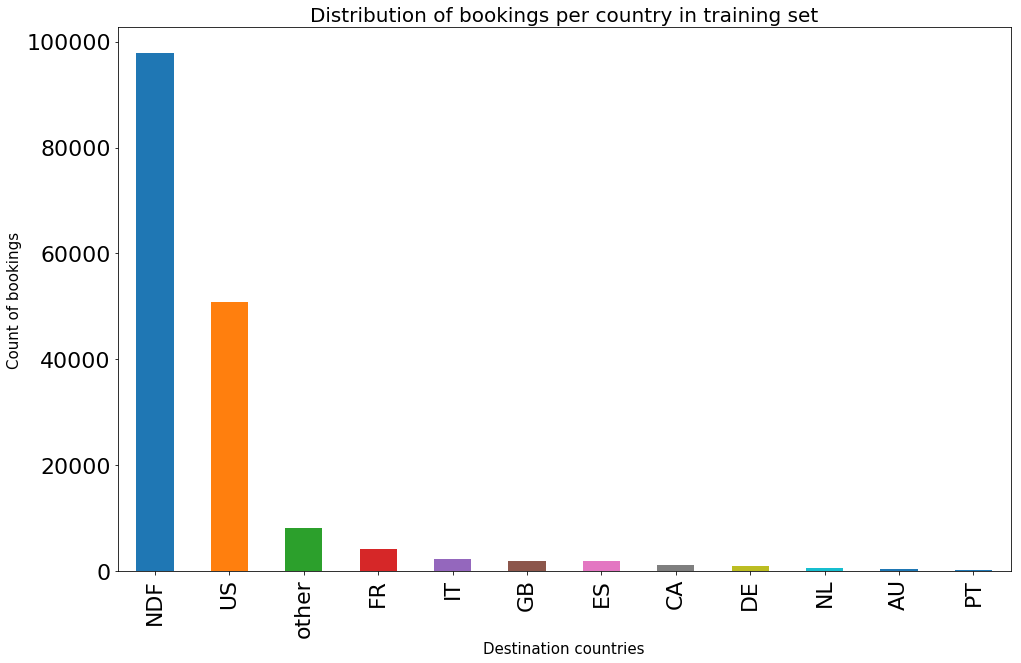

In [10]:
y_train['country_destination'].value_counts().plot('bar')
plt.xlabel('Destination countries', fontsize=15)
plt.ylabel('Count of bookings', fontsize=15)
plt.title('Distribution of bookings per country in training set', fontsize=20)